In [1]:
file_list = ["vascular_multimodal_dataset_{}.csv".format(i) for i in range(1, 9)]

In [2]:
file_list

['vascular_multimodal_dataset_1.csv',
 'vascular_multimodal_dataset_2.csv',
 'vascular_multimodal_dataset_3.csv',
 'vascular_multimodal_dataset_4.csv',
 'vascular_multimodal_dataset_5.csv',
 'vascular_multimodal_dataset_6.csv',
 'vascular_multimodal_dataset_7.csv',
 'vascular_multimodal_dataset_8.csv']

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
sets = [set(pd.read_csv(file_list[i])) for i in range(8)]
result = sets[0]
for s in sets:
    result = result.intersection(s)
intersect_cols = list(result)

In [5]:
dfs = [pd.read_csv(file_list[i]) for i in range(8)]
MCI_df = pd.concat(dfs, ignore_index=True)
MCI_df.shape

(64, 95)

In [6]:
MCI_df = MCI_df[intersect_cols]

In [7]:
MCI_df.head()

,PO_PR_RAVLT_1.5_SUM,lh_middletemporal_volume_PR,lh_bankssts_volume_PR,lh_precentral_volume_PR,left_fimbria_volume_PR,right_fimbria_volume_PR,lh_fusiform_volume_PR,left_subiculum_volume_PR,right_CA2_3_volume_PR,right_CA4_DG_volume_PR,...,right_subiculum_volume_PR,lh_caudalmiddlefrontal_volume_PR,right_hippocampal_fissure_volume_PR,lh_caudalanteriorcingulate_volume_PR,left_CA4_DG_volume_PR,lh_lateraloccipital_volume_PR,lh_parstriangularis_volume_PR,lh_medialorbitofrontal_volume_PR,lh_precuneus_volume_PR,right_presubiculum_volume_PR
0,0.053125,-0.224734,-0.063711,-0.261064,-0.351689,-0.437072,-0.251155,-0.581194,-0.532523,-0.507957,...,-0.469564,0.201931,-0.473180,-0.109818,-0.383575,-0.483999,0.045713,-0.292890,-0.379170,-0.490694
1,0.053125,0.286152,0.150408,-0.158623,-0.067693,-0.017203,-0.056301,0.321844,0.467477,0.475523,...,0.530436,-0.055926,0.141110,0.173818,0.616425,0.363179,-0.179239,0.321561,-0.012933,0.228118
2,-0.603125,0.017038,-0.236406,-0.370708,-0.046379,0.163893,-0.147130,-0.299747,-0.160489,-0.199008,...,-0.415721,-0.319084,0.320350,-0.392545,-0.232825,-0.636821,0.030780,-0.325260,-0.302216,-0.192669
3,0.396875,0.298304,-0.037456,-0.141016,0.648311,0.227329,0.626347,0.307935,0.447076,0.492043,...,0.477713,-0.165733,0.511321,-0.142545,0.318076,0.092413,0.147832,0.373006,0.620830,0.509306
4,-0.165625,0.004886,-0.247491,0.309564,0.056678,0.073350,0.120079,0.418806,0.035584,0.031419,...,-0.053257,-0.387618,0.526820,0.177455,0.162855,0.210716,0.187813,0.144682,-0.165633,0.222992


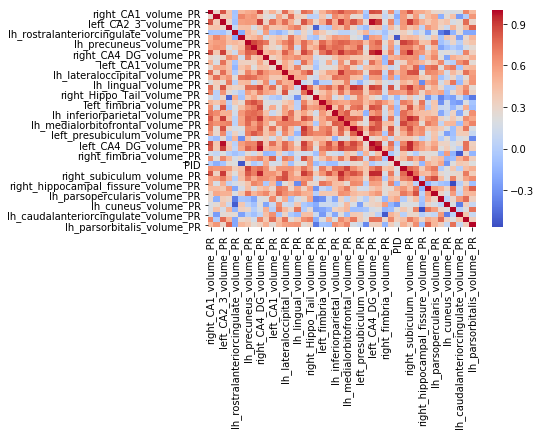

In [37]:
sns.heatmap(MCI_df.corr(), cmap='coolwarm')

In [38]:
sns.pairplot(MCI_df)

In [8]:
# Many features seem to be linearly related. This will create unwanted variance in our models and does not contribute
# new information. Let us get rid of them

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [10]:
Y = MCI_df['PO_PR_RAVLT_1.5_SUM']
MCI_df = calculate_vif_(MCI_df)

e:\programs\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'PO_PR_RAVLT_1.5_SUM' at index: 0
dropping 'lh_middletemporal_volume_PR' at index: 0
dropping 'lh_bankssts_volume_PR' at index: 0
dropping 'lh_precentral_volume_PR' at index: 0
dropping 'left_fimbria_volume_PR' at index: 0
dropping 'right_fimbria_volume_PR' at index: 0
dropping 'lh_fusiform_volume_PR' at index: 0
dropping 'left_subiculum_volume_PR' at index: 0
dropping 'right_CA2_3_volume_PR' at index: 0
dropping 'right_CA4_DG_volume_PR' at index: 0
dropping 'lh_rostralanteriorcingulate_volume_PR' at index: 0
dropping 'left_hippocampal_fissure_volume_PR' at index: 0
dropping 'lh_inferiortemporal_volume_PR' at index: 1
dropping 'lh_lateralorbitofrontal_volume_PR' at index: 1
dropping 'lh_isthmuscingulate_volume_PR' at index: 1
dropping 'right_Hippo_Tail_volume_PR' at index: 1
dropping 'lh_lingual_volume_PR' at index: 1
dropping 'right_CA1_volume_PR' at index: 1
dropping 'left_CA1_volume_PR' at index: 1
dropping 'left_CA2_3_volume_PR' at index: 1
dropping 'lh_parahippocampal_vol

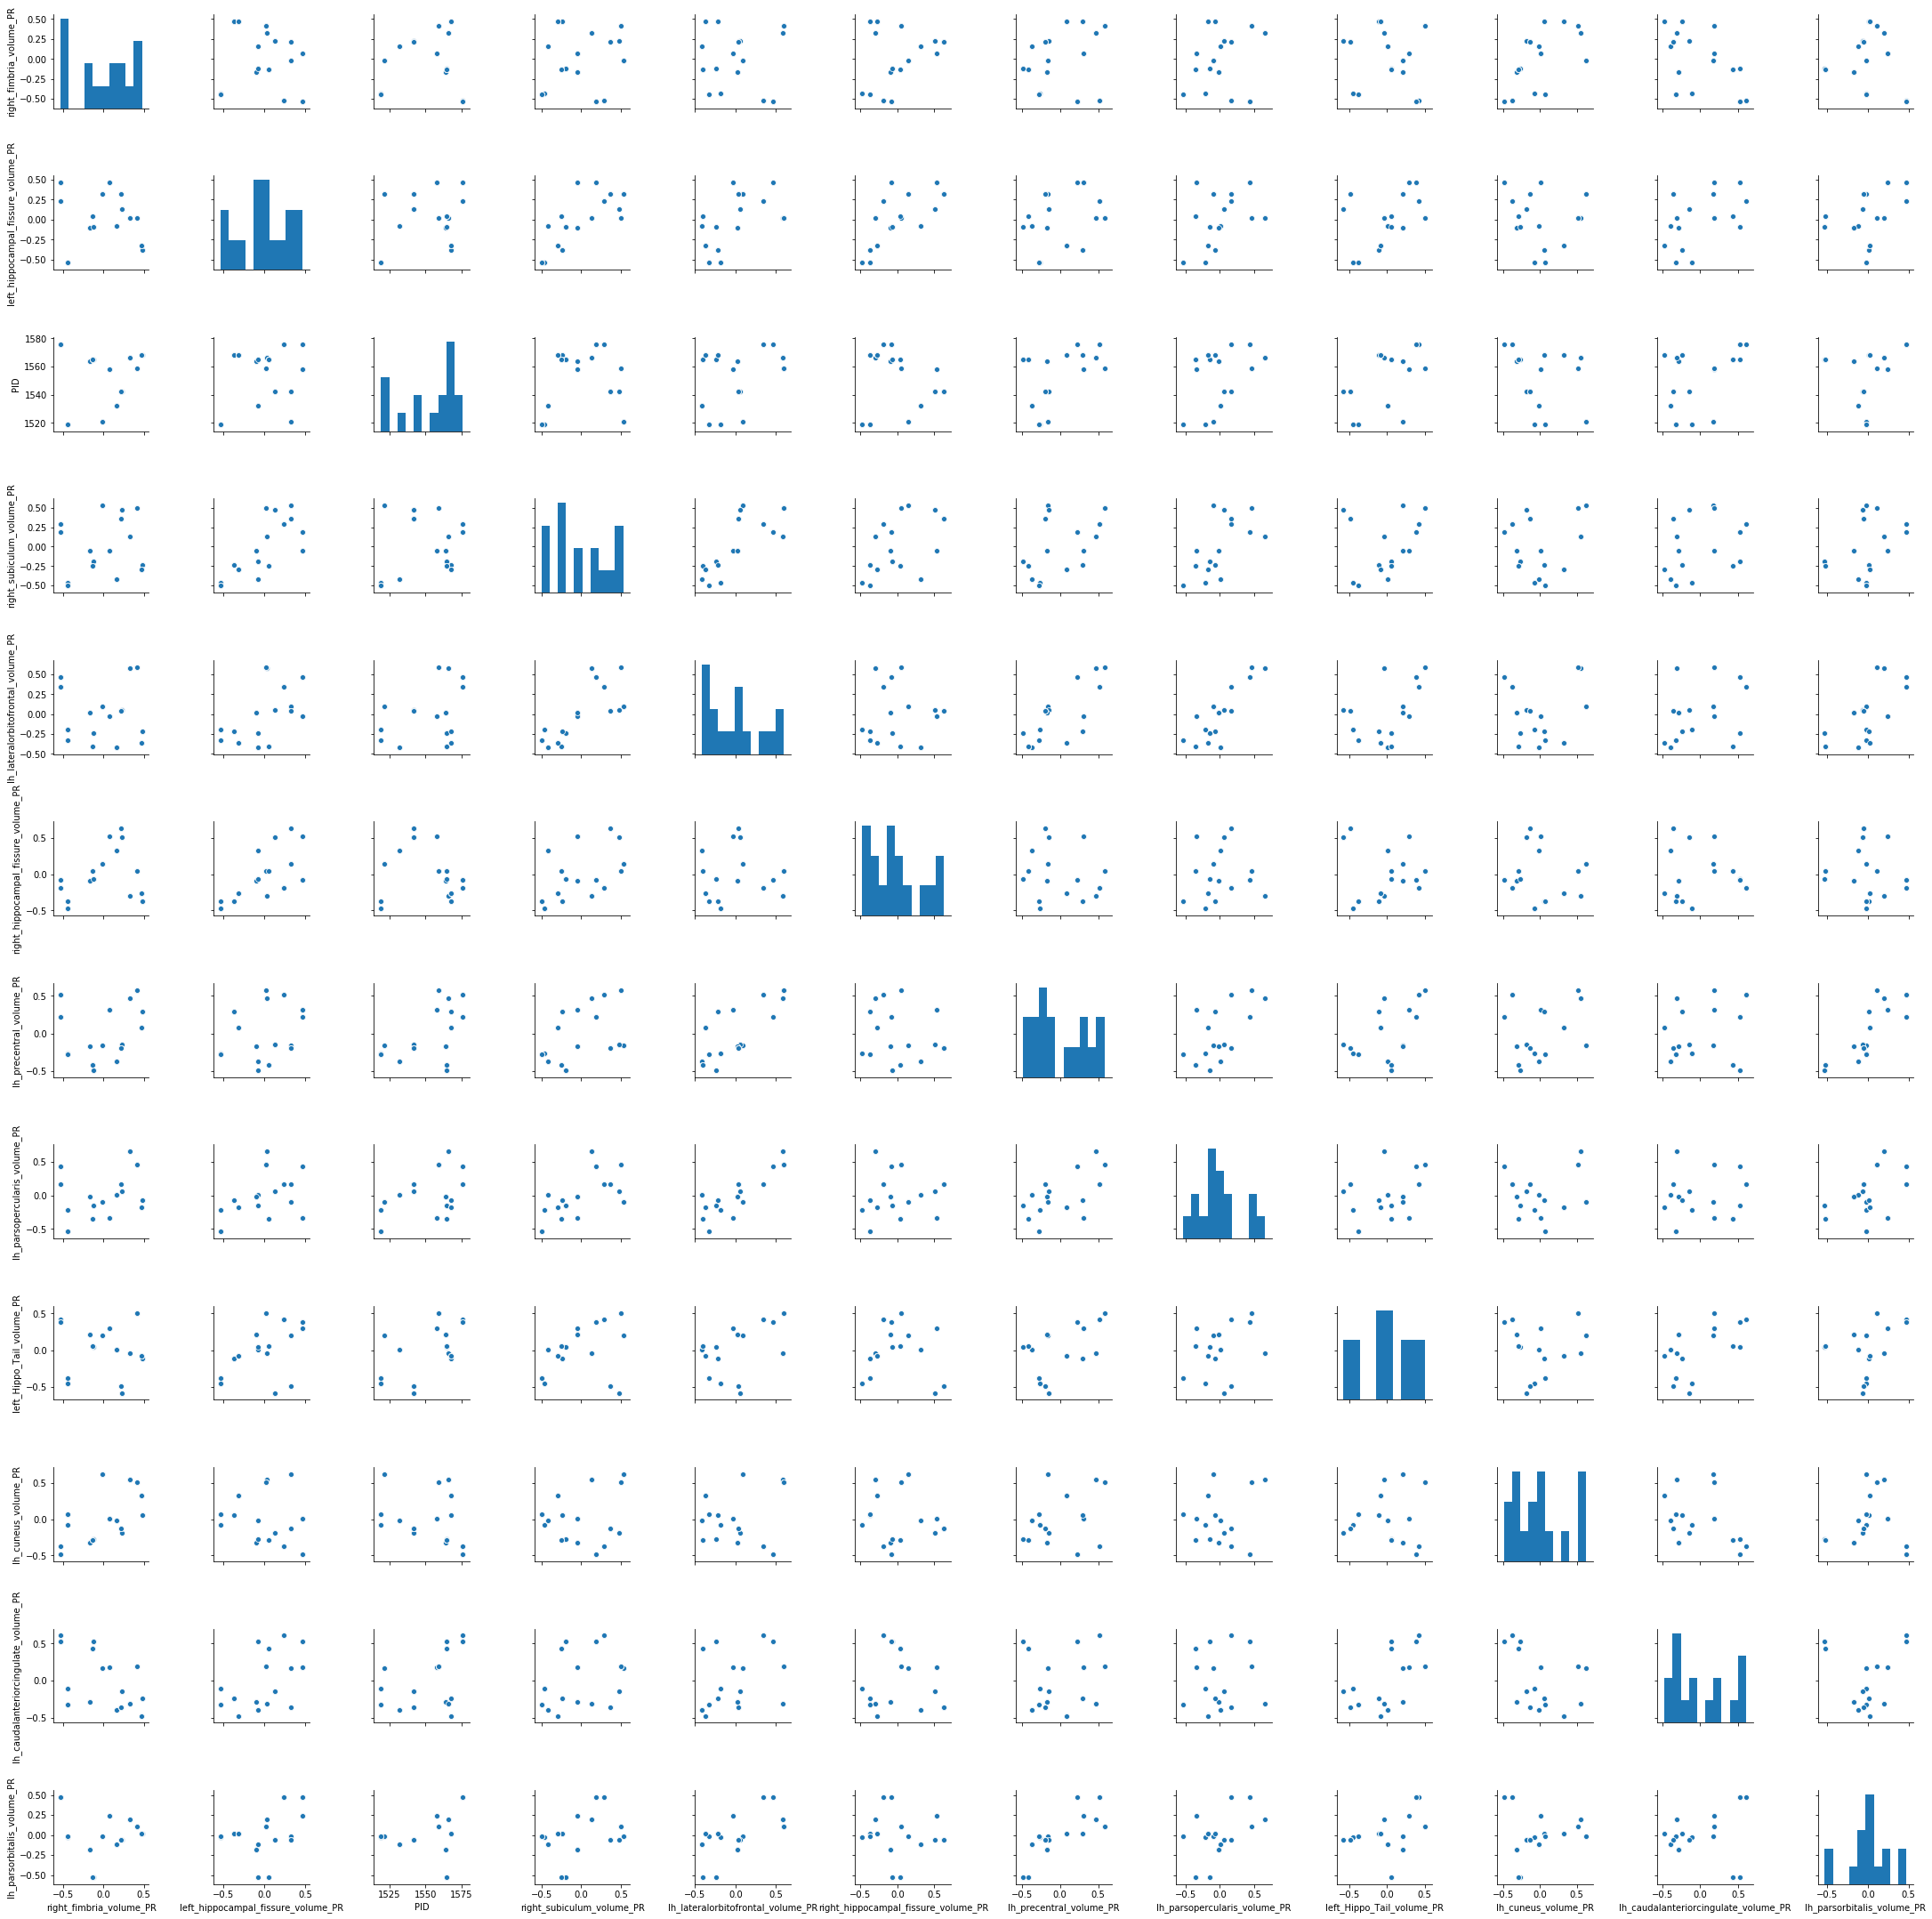

In [49]:
sns.pairplot(MCI_df)

In [11]:
# now we can see our features are much more varied and not so srongly related

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(MCI_df.index, Y, test_size=0.2)

print("Number of train datapoints: {}".format(X_train.shape[0]))
print("Number of test datapoints: {}".format(y_test.shape[0]))

lm = LinearRegression()
lm.fit(MCI_df.iloc[X_train], y_train)

predictions = lm.predict(MCI_df.iloc[X_test])

mse = np.sqrt(np.mean((y_test - predictions) ** 2))
print ("The RMSE from Linear Model with one train/test split: {}".format(mse))

mse_naive = np.sqrt(np.mean((np.mean(y_train) - y_test) ** 2))
print ("The MSE from Naive prediction: {}".format(mse_naive))

kf = KFold(n_splits=5)
kf.get_n_splits(MCI_df)

c=1
for train_index, test_index in kf.split(MCI_df):
    X_train, X_test = MCI_df.iloc[train_index], MCI_df.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)

    mse = np.mean((y_test - predictions) ** 2)
    print ("The MSE from Linear Model fold #{}: {}".format(c,mse))
    c= c+1
    

Number of train datapoints: 51
Number of test datapoints: 13
The RMSE from Linear Model with one train/test split: 0.04579575319482471
The MSE from Naive prediction: 0.2531511894675581
The MSE from Linear Model fold #1: 0.0016517546892290786
The MSE from Linear Model fold #2: 0.003446005900734498
The MSE from Linear Model fold #3: 0.002404533335054556
The MSE from Linear Model fold #4: 0.004135413883113451
The MSE from Linear Model fold #5: 0.004485680684901262


In [13]:
import xgboost

xgb = xgboost.XGBRegressor()

c=1
for train_index, test_index in kf.split(MCI_df):
    X_train, X_test = MCI_df.iloc[train_index], MCI_df.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    xgb.fit(X_train, y_train)
    predictions = xgb.predict(X_test)

    mse = np.sqrt(np.mean((y_test - predictions) ** 2))
    print ("The MSE from XGB Model fold #{}: {}".format(c,mse))
    c= c+1

The MSE from XGB Model fold #1: 0.0008822653487582359
The MSE from XGB Model fold #2: 0.0003384347806429847
The MSE from XGB Model fold #3: 0.0004627601028228458
The MSE from XGB Model fold #4: 0.0007666875603016068
The MSE from XGB Model fold #5: 0.0006171724164485331
